## Imports

In [455]:
import pandas as pd
from pandas.plotting import parallel_coordinates
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import csv
import random

## Define functions and Display Sample Data from jsPsych

In [456]:
def get_reaction_time(raw_data):
    # Extract actual data from column 10 to 11
    actual_col = 9
    tap_cop = 10
    actual_data = raw_data.iloc[:, actual_col]
    tap_cop_data = raw_data.iloc[:, tap_cop]

    # Remove column with blank values
    actual_data = actual_data.dropna(how='all', axis=0)
    tap_cop_data = tap_cop_data.dropna(how='all', axis=0)

    # Extract each timestamp from the data and store as individual data points
    actual_time_stamp = actual_data.apply(ast.literal_eval) # Parse the string representation of lists into actual lists
    tap_time_stamp = tap_cop_data.apply(ast.literal_eval)

    num_trial = len(actual_time_stamp)
    num_tap = len(actual_time_stamp.iloc[0]) 

    # Calculate reaction time
    # initiate dictionary to store the data
    reaction_dict = {trial: {tap: 0 for tap in range(num_tap)} for trial in range(num_trial)}

    # Ensure the data is processed correctly
    for i, bounces in enumerate(actual_time_stamp):
        for j, time in enumerate(bounces):
            reaction_dict[i][j] = float(tap_time_stamp.iloc[i][j]) - float(time)

    # Calculate the average reaction time for each trial
    avg_trial_reaction = {trial: np.mean(list(reaction_dict[trial].values())) for trial in range(num_trial)}
    # Average reaction time across all trials
    avg_all_reaction = np.mean(list(avg_trial_reaction.values()))
    return avg_trial_reaction, reaction_dict, avg_all_reaction

    # 

def display_reaction_time_single(reaction_dict):
    # Display the reaction time
    # Plot
    keys = list(reaction_dict.keys())
    values = [list(trial.values()) for trial in reaction_dict.values()]  # Extract values from each dictionary

    # Plot each trial's values
    plt.figure(figsize=(15,5))
    for key, value in zip(keys, values):
    	plt.plot(range(len(value)), value, marker='o', linestyle='-', label=f'Trial {key}')

    # Mark a baseline at 0
    plt.axhline(y=0, color='r', linestyle='--')

    plt.ylim(-0.125, 0.125) # Adjust y-axis limits

    # Add labels and title
    plt.xlabel('Tap Index')
    plt.ylabel('Reaction Time Difference')
    plt.title('Reaction Time Differences Across Trials')

    # Display the plot
    plt.legend()
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()

def display_reaction_time_avg(group_reaction):
    # Display the average reaction time

    # Plot the average reaction time for each trial
    plt.figure(figsize=(15,5))

    for participant,avg_trial_reaction in group_reaction.items():
        keys = list(avg_trial_reaction.keys())
        values = list(avg_trial_reaction.values())
        plt.plot(keys, values, marker='o', linestyle='-')

    # Mark a baseline at 0
    plt.axhline(y=0, color='r', linestyle='--')

    # Add labels and title
    plt.xlabel('Trial Index')
    plt.ylabel('Average Reaction Time Difference')
    plt.title('Average Reaction Time Differences Across Trials')

    # Display the plot
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()



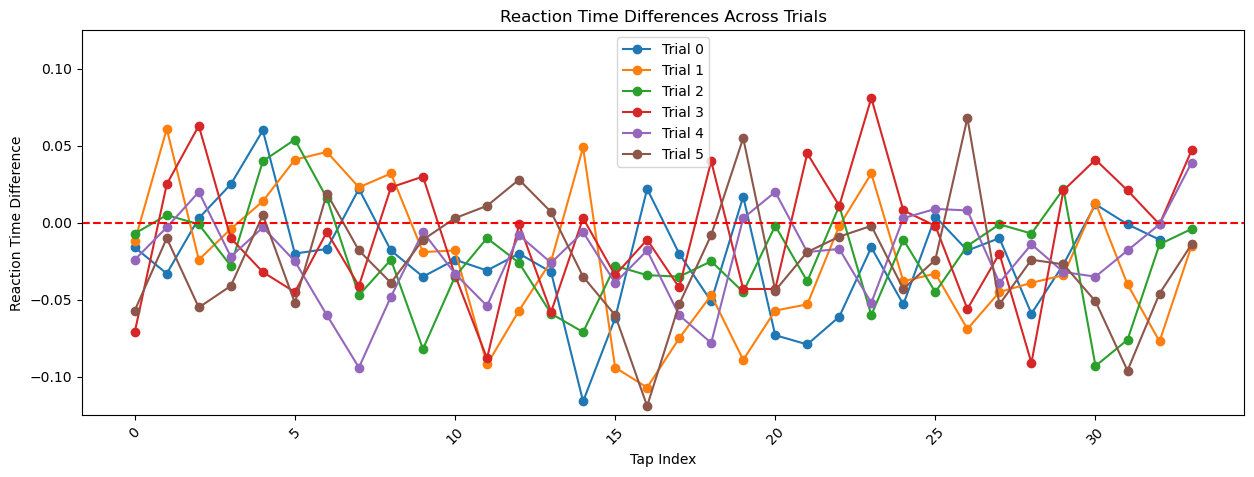

In [457]:

sample_data = pd.read_csv('/Users/ruiz/Documents/Study/PNB3EE3/zongRuiyan/Zong_Ruiyan_Assignment/project/Data/Simulation Data Sample.csv')
raw_data = sample_data
avg_trial_reaction, reaction_dict,avg_all_reaction = get_reaction_time(raw_data)
sample_std = np.std(list(avg_trial_reaction.values()))
sample_mean = np.mean(list(avg_trial_reaction.values()))


display_reaction_time_single(reaction_dict)


## Data Simulation

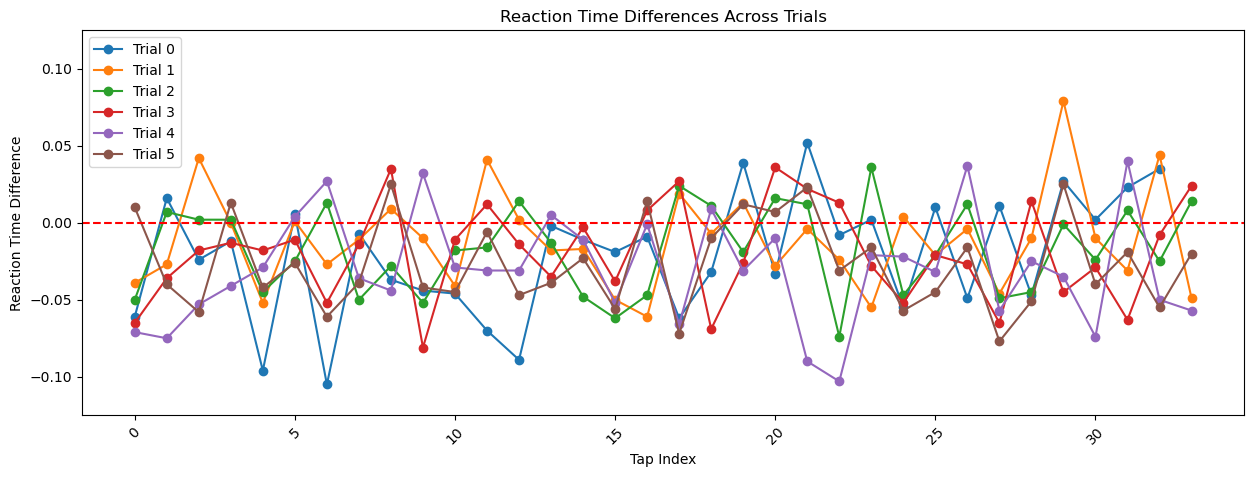

In [465]:
# Data Simulation
groups = ['musician','athelete','control']

# Generate random data for simulation
header = ['success','rt','trial_type','trial_index', 'plugin_version', 'time_elapsed', 'Participant ID', 'stimulus', 'response', 'bounce_time', 'response_time']
num_row = 17

# generate random data for bounce time and response time
def generate_data(group_name, num_participants = 20):
    for i in range(num_participants):
        participant_id  = f'{group_name}_P{i+1}'
        data = []

        # Generate random data for each participant
        for j in range(num_row):
            bounce_time = raw_data.iloc[j, 9]
            # extract the bounce time and simulate response time based on the bounce time
            # Ensure bounce_time is parsed as a list
            if isinstance(bounce_time, str):
                actual_time_stamp = ast.literal_eval(bounce_time)
            else:
                # If bounce_time is not iterable, skip this iteration
                continue
            rdm_response_list = []
            # Generate a random walk component for realistic variability
            random_walk = np.random.normal(0, 0.03, len(actual_time_stamp))
            for idx,time in enumerate(actual_time_stamp):
                base_time = float(time)
                noise = np.random.normal(sample_mean, sample_std)
                variation = random_walk[idx]
                rdm_response_time = base_time + noise + variation
                rdm_response_list.append(f"{rdm_response_time:.3f}")  # Format the float to a string with 6 decimal places
            
            # Other elements in the data
            success = True
            rt = 'null'
            trial_type = 'null'
            # trial_index
            trials = np.arange(0, 18, 1)
            trial_index = trials[j]
            #
            plugin_version = 'N/A'
            time_elapsed = 'N/A'
            stimulus = 'N/A'
            response = 'N/A'
            response_data_string = "[" + ",".join(rdm_response_list) + "]"
            data.append([success, rt, trial_type, trial_index, plugin_version, time_elapsed, participant_id, stimulus, response, bounce_time, response_data_string])

            # Save File
            with open(f'/Users/ruiz/Documents/Study/PNB3EE3/zongRuiyan/Zong_Ruiyan_Assignment/project/Data/{group_name}_P{i+1}.csv', 'w') as f:
                writer = csv.writer(f)
                writer.writerow(header)
                writer.writerows(data)
    return data, rdm_response_time


# test
generate_data('musician', 1)

test_data = pd.read_csv('/Users/ruiz/Documents/Study/PNB3EE3/zongRuiyan/Zong_Ruiyan_Assignment/project/Data/musician_P1.csv')
reaction_time, reaction_dict,avg_all_reaction = get_reaction_time(test_data)
display_reaction_time_single(reaction_dict)


In [ ]:
generate_data('musician', 20)
generate_data('athelete', 20)
generate_data('control', 20)

## Data Analysis

### Musician

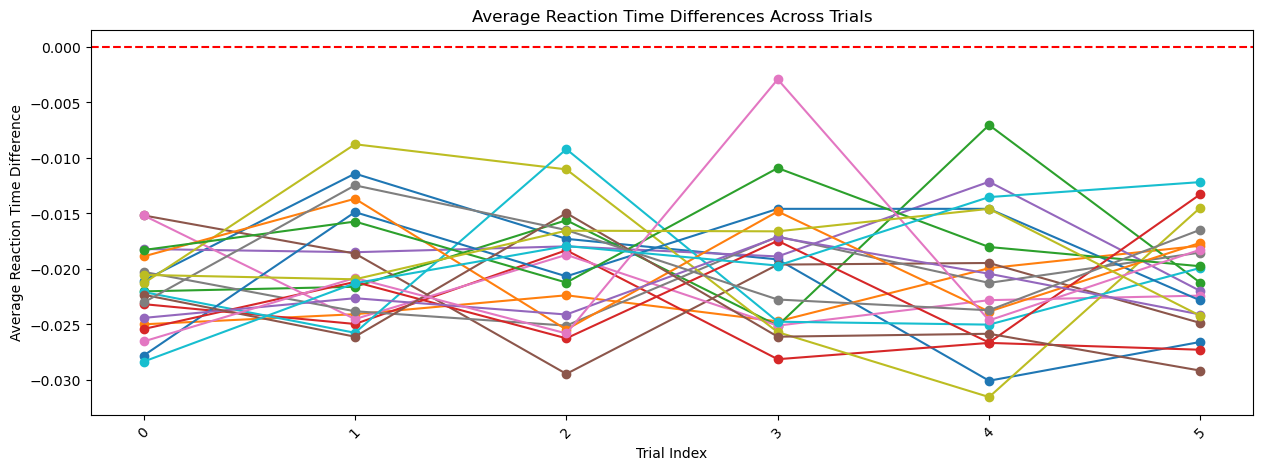

Musician Group Average: -0.020435828877005437
Musician Group Standard Deviation: 0.0019295446592604664


In [467]:
num_participants_each_group = 20

# Musician
musician_data = {}
musician_reaction = {}

for i in range(num_participants_each_group):
    musician_data[i] = pd.read_csv(f'/Users/ruiz/Documents/Study/PNB3EE3/zongRuiyan/Zong_Ruiyan_Assignment/project/Data/musician_P{i+1}.csv')
    avg_trial_reaction, reaction_dict, avg_all_reaction = get_reaction_time(musician_data[i])
    musician_reaction[f"Musician {i+1}"] = avg_trial_reaction

display_reaction_time_avg(musician_reaction)
#Descriptive Statistics
musician_group_average = np.mean([np.mean(list(reaction.values())) for reaction in musician_reaction.values()])
musician_group_std = np.std([np.mean(list(reaction.values())) for reaction in musician_reaction.values()])

print(f"Musician Group Average: {musician_group_average}")
print(f"Musician Group Standard Deviation: {musician_group_std}")

### Atheletes

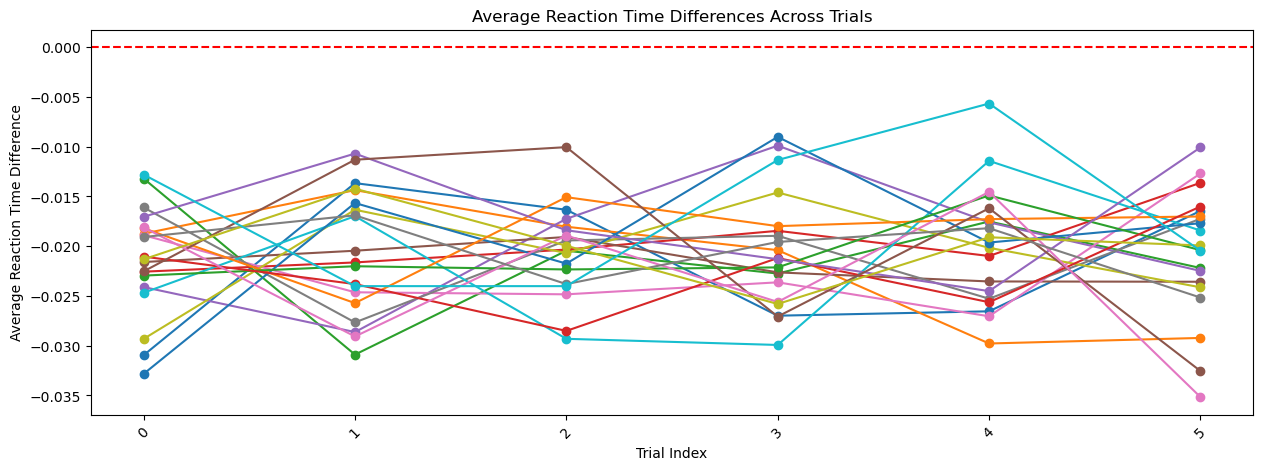

Athelete Group Average: -0.020536608734402936
Athelete Group Standard Deviation: 0.0017256433611526295


In [460]:
# Athelete
athelete_data = {}
athelete_reaction = {}

# Populate athelete_data with valid data
for i in range(num_participants_each_group):
    athelete_data[i] = pd.read_csv(f'/Users/ruiz/Documents/Study/PNB3EE3/zongRuiyan/Zong_Ruiyan_Assignment/project/Data/athelete_P{i+1}.csv')
    avg_trial_reaction, reaction_dict, avg_all_reaction = get_reaction_time(athelete_data[i])
    athelete_reaction[f"Athelete {i+1}"] = avg_trial_reaction

# Plot
display_reaction_time_avg(athelete_reaction)

# Descriptive statistics
athelete_group_average = np.mean([np.mean(list(reaction.values())) for reaction in athelete_reaction.values()])
athelete_group_std = np.std([np.mean(list(reaction.values())) for reaction in athelete_reaction.values()])
print(f"Athelete Group Average: {athelete_group_average}")
print(f"Athelete Group Standard Deviation: {athelete_group_std}")



### Control

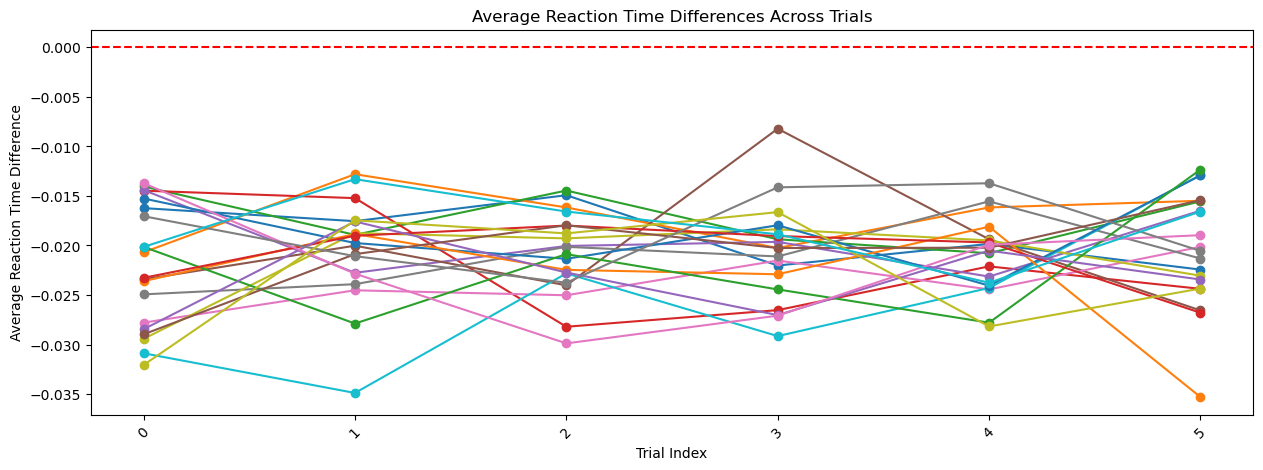

Control Group Average: -0.020883600713012533
Control Group Standard Deviation: 0.00234181143365164


In [461]:
# Control
control_data = {}
control_reaction = {}

# Populate control_data with valid data
for i in range(num_participants_each_group):
    control_data[i] = pd.read_csv(f'/Users/ruiz/Documents/Study/PNB3EE3/zongRuiyan/Zong_Ruiyan_Assignment/project/Data/control_P{i+1}.csv')
    avg_trial_reaction, reaction_dict, avg_all_reaction = get_reaction_time(control_data[i])
    control_reaction[f"Control {i+1}"] = avg_trial_reaction

display_reaction_time_avg(control_reaction)
# Descriptive statistics
control_group_average = np.mean([np.mean(list(reaction.values())) for reaction in control_reaction.values()])
control_group_std = np.std([np.mean(list(reaction.values())) for reaction in control_reaction.values()])
print(f"Control Group Average: {control_group_average}")
print(f"Control Group Standard Deviation: {control_group_std}")

### Analysis over all groups

In [476]:
# Parallel Coordinates Plot
# Prepare data for parallel coordinates plot
musician_df = pd.DataFrame.from_dict(musician_reaction, orient='index')
musician_df.index.name = "Participant"
musician_df.columns.name = "Trial"
athelete_df = pd.DataFrame.from_dict(athelete_reaction, orient='index')
musician_df.index.name = "Participant"
musician_df.columns.name = "Trial"
control_df = pd.DataFrame.from_dict(control_reaction, orient='index')
musician_df.index.name = "Participant"
musician_df.columns.name = "Trial"

dfs = [musician_df, athelete_df, control_df]
df = pd.concat(dfs)

#print(df)
group_avg = {}
for group in groups:
    group_rows = df.loc[df.index.str.contains(f'{group}', case=False, na=False)]
    group_avg[group] = group_rows.mean()
#print(group_avg)

# Convert into a DataFrame
df_avg = pd.DataFrame.from_dict(group_avg)
df_avg.index.name = "Group"
df_avg.columns.name = "Trial"
print(df_avg)


# Reset index and prepare data for parallel coordinates plot
df_avg_reset = df_avg.reset_index()
df_avg_reset.rename(columns={'Group': 'Trial'}, inplace=True)


Trial  musician  athelete   control
Group                              
0     -0.021959 -0.021318 -0.021955
1     -0.019593 -0.020449 -0.020409
2     -0.019735 -0.020444 -0.020881
3     -0.019569 -0.020478 -0.020735
4     -0.021097 -0.019791 -0.021066
5     -0.020662 -0.020740 -0.020256


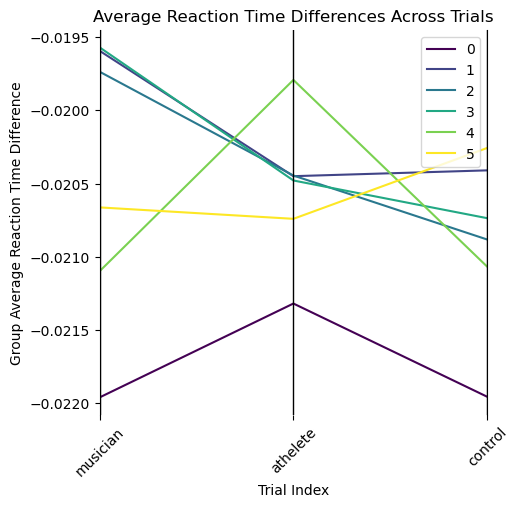

In [483]:
# Plot
plt.figure(figsize=(5, 5))
parallel_coordinates(df_avg_reset, 'Trial', colormap='viridis')
#plt.ylim(-0.125, 0.125) # Adjust y-axis limits
# Mark a baseline at 0
#plt.axhline(y=0, color='r', linestyle='--')

ax = plt.gca()  # Get current axis
ax.spines['top'].set_visible(False)  # Remove the top spine
ax.spines['bottom'].set_visible(False)  # Remove the bottom spine
ax.grid(False)


plt.title('Average Reaction Time Differences Across Trials')
plt.ylabel('Group Average Reaction Time Difference')
plt.xlabel('Trial Index')
plt.xticks(rotation=45)
plt.show()






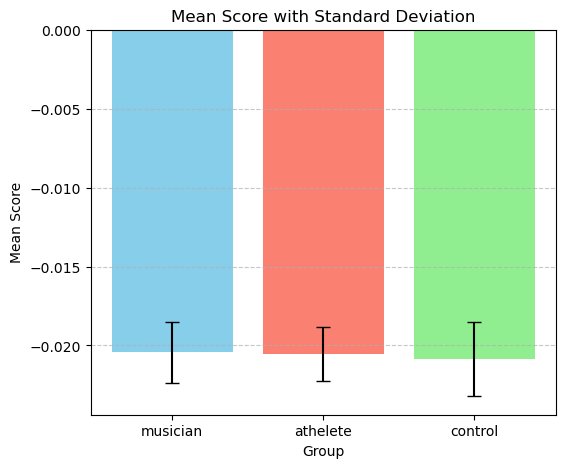

In [478]:
# bar plot with mean and standard deviation

means = [musician_group_average, athelete_group_average, control_group_average]
stds = [musician_group_std, athelete_group_std, control_group_std]

# Plot
plt.figure(figsize=(6, 5))
plt.bar(groups, means, yerr=stds, capsize=5, color=['skyblue', 'salmon', 'lightgreen'])
plt.xlabel("Group")
plt.ylabel("Mean Score")
plt.title("Mean Score with Standard Deviation")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [450]:
#import statsmodels.api as sm
#from statsmodels.formula.api import ols
#from statsmodels.stats.anova import AnovaRM

import pingouin as pg

In [453]:
# Anova Analysis
# Prepare data for ANOVA
#df = df.transpose()
df['participant_id'] = df.index
df['group'] = df['participant_id'].str.extract(r'(\w+)', expand=False)
df_long = pd.melt(df,id_vars = ['participant_id','group'], var_name='Trial', value_name='ReactionTime')
#print(df_long)

df_long = pd.DataFrame(df_long,columns = ['participant_id', 'group', 'Trial', 'ReactionTime'])

# Perform repeated measures ANOVA
anova_results = pg.mixed_anova(dv='ReactionTime', within='Trial', between='group', subject='participant_id', data=df_long)
print(anova_results)

        Source        SS  DF1  DF2        MS         F     p-unc       np2  \
0        group  0.000023    2   57  0.000011  0.429922  0.652652  0.014861   
1        Trial  0.000091    5  285  0.000018  0.639245  0.669934  0.011090   
2  Interaction  0.000034   10  285  0.000003  0.118666  0.999604  0.004146   

        eps  
0       NaN  
1  0.937711  
2       NaN  


/Users/ruiz/anaconda3/lib/python3.11/site-packages/pingouin/distribution.py:1004: RuntimeWarning: divide by zero encountered in scalar divide
  W = np.prod(eig) / (eig.sum() / d) ** d


## Breakdown Steps

In [ ]:
# Data clean up
sample_data = pd.read_csv('/Users/ruiz/Documents/Study/PNB3EE3/zongRuiyan/Zong_Ruiyan_Assignment/project/Data/Simulation Data Sample.csv')

# Extract actual data from column 10 to 11
actual_col = 9
tap_cop = 10
sample_actual_data = sample_data.iloc[:, actual_col]
sample_tap_cop_data = sample_data.iloc[:, tap_cop]

# Remove column with blank values
sample_actual_data = sample_actual_data.dropna(how='all', axis=0)
sample_tap_cop_data = sample_tap_cop_data.dropna(how='all', axis=0)

# Extract each timestamp from the data and store as individual data points
import ast
sample_actual_time_stamp = sample_actual_data.apply(ast.literal_eval) # Parse the string representation of lists into actual lists
sample_tap_time_stamp = sample_tap_cop_data.apply(ast.literal_eval)

num_trial = len(sample_actual_time_stamp)
num_tap = len(sample_actual_time_stamp.iloc[0]) 


In [ ]:
# initiate dictionary to store the data
reaction_dict = {trial: {tap: 0 for tap in range(num_tap)} for trial in range(num_trial)}

# Ensure the data is processed correctly
for i, bounces in enumerate(sample_actual_time_stamp):
    for j, time in enumerate(bounces):
        reaction_dict[i][j] = float(sample_tap_time_stamp.iloc[i][j]) - float(time)

# Calculate the average reaction time for each trial
reaction_time = {trial: np.mean(list(reaction_dict[trial].values())) for trial in range(num_trial)}
print(reaction_time)

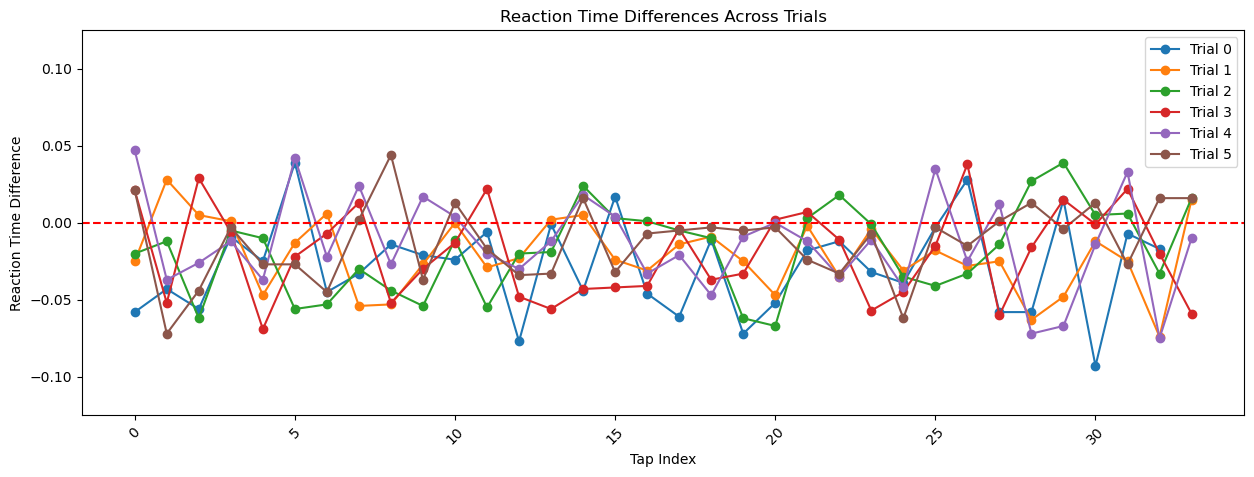

In [469]:
# Plot
keys = list(reaction_dict.keys())
values = [list(trial.values()) for trial in reaction_dict.values()]  # Extract values from each dictionary

# Plot each trial's values
plt.figure(figsize=(15,5))
for key, value in zip(keys, values):
	plt.plot(range(len(value)), value, marker='o', linestyle='-', label=f'Trial {key}')

# Mark a baseline at 0
plt.axhline(y=0, color='r', linestyle='--')

plt.ylim(-0.125, 0.125) # Adjust y-axis limits


# Add labels and title
plt.xlabel('Tap Index')
plt.ylabel('Reaction Time Difference')
plt.title('Reaction Time Differences Across Trials')

# Display the plot
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()